In [2]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'movies.csv')


In [3]:
# Now let's take a look at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

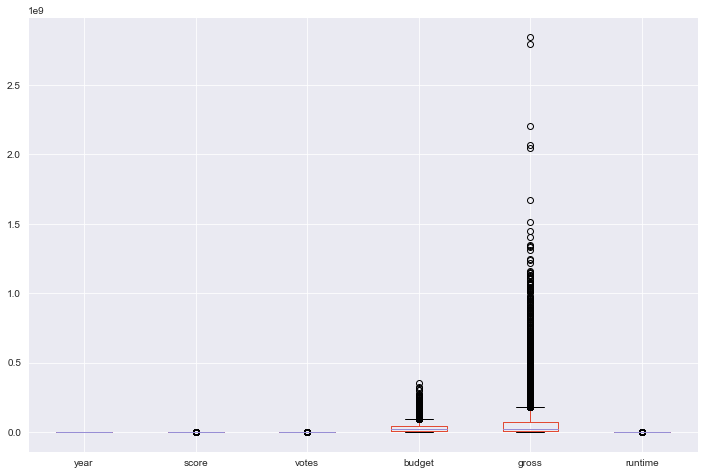

In [36]:
# Are there any Outliers?
#df.boxplot(column=df.columns)
col=df.columns

df.boxplot()

In [7]:
# Checking if any duplicates are present i.e movies of the same name
# keeping only the first occurence of duplicate movies present in the dataset

df=df.drop_duplicates(subset='name',keep='first')

In [8]:
# Ordering the dataset by highest grossing movies first

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

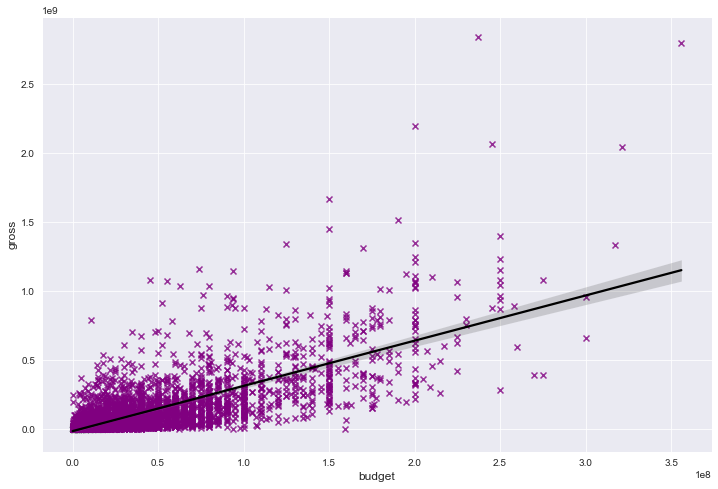

In [9]:
# Now the questions arrises if there is any relation btw budget and revenue of a movie
# Our general intution says that there should be a linearly increasing relation btw them, so lets check
sns.set_style('darkgrid')
sns.regplot(x="budget", y="gross", data=df, marker='x', scatter_kws={"color":"purple"},line_kws={'color':'black'})

<AxesSubplot:xlabel='score', ylabel='gross'>

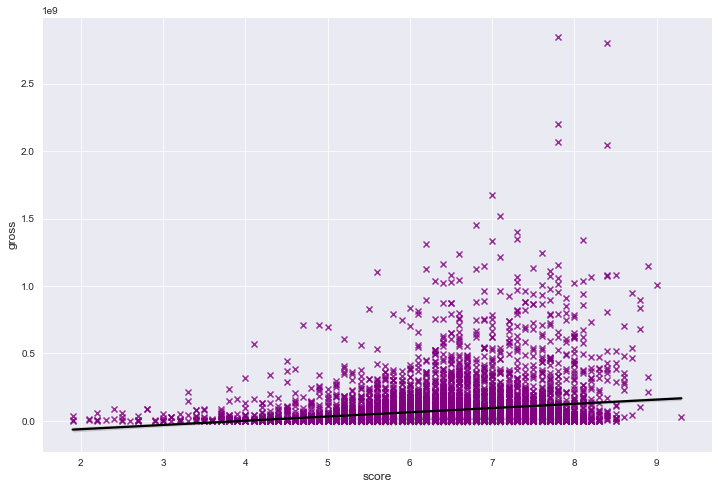

In [10]:
#There is definetly a linear relation btw budget and revenue
#lets check if there's any btw score and revenue

sns.regplot(x="score", y="gross", data=df, marker='x', scatter_kws={"color":"purple"},line_kws={'color':'black'})

In [11]:
# Lets make a Correlation Matrix between all numeric columns
# Pearson is the most widely used method, so we will go with it

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.103973,0.224029,0.328196,0.255106,0.121848
score,0.103973,1.000000,0.408426,0.073990,0.185997,0.397834
votes,0.224029,0.408426,1.000000,0.439785,0.633050,0.305903
budget,0.328196,0.073990,0.439785,1.000000,0.738938,0.320878
gross,0.255106,0.185997,0.633050,0.738938,1.000000,0.246240
runtime,0.121848,0.397834,0.305903,0.320878,0.246240,1.000000


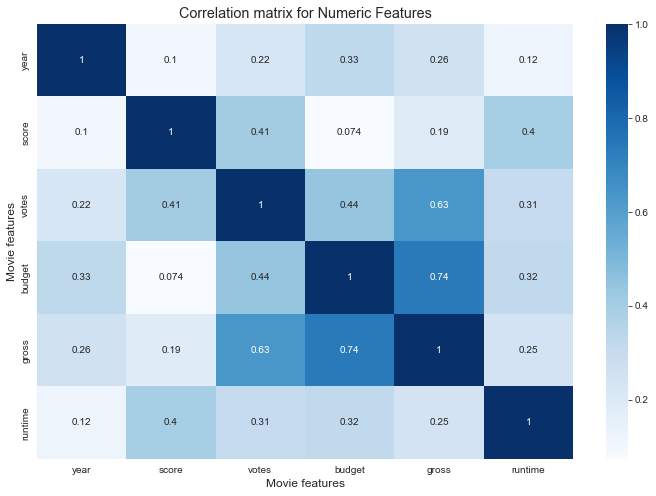

In [12]:
#Let's draw a heatmap of the corelation matrix of our dataset

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [13]:
# The corelation atrix only forms for numerical columns
# So to see corelation btw all columns we can assign some codes to the categorical data in diff columns

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1692,8.4,927000.0,2559,3973,1034,54,19000000.0,46998772.0,2293,146.0
1,5573,6,1,1980,1479,5.8,65000.0,2243,1613,320,55,4500000.0,58853106.0,724,104.0
2,5142,4,0,1980,1757,8.7,1200000.0,1100,2535,1728,55,18000000.0,538375067.0,1523,124.0
3,286,4,4,1980,1479,7.7,221000.0,1289,1978,2224,55,3500000.0,83453539.0,1791,88.0
4,1027,6,4,1980,1530,7.3,108000.0,1044,515,403,55,6000000.0,39846344.0,1756,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2941,3.1,18.0,1485,2261,2396,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1097,4.7,36.0,764,2582,1868,55,NaN,NaN,534,90.0
7665,4717,-1,6,2020,192,5.7,29.0,2036,2651,2019,55,58750.0,NaN,929,NaN
7666,2843,-1,6,2020,2796,NaN,NaN,1173,1803,443,55,15000.0,NaN,-1,120.0


In [14]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.007152,0.017124,0.010934,-0.013797,0.018349,0.013294,0.010437,0.013851,0.005211,-0.010492,0.023295,0.004540,0.010387,0.010896
rating,-0.007152,1.000000,0.070976,0.009023,0.019131,-0.002159,0.032527,0.017341,-0.005228,0.014910,0.080954,-0.174111,-0.103695,-0.033570,0.063332
genre,0.017124,0.070976,1.000000,-0.082602,0.030424,0.031690,-0.144297,-0.015947,0.004759,-0.001779,-0.041136,-0.354975,-0.237758,-0.069863,-0.050938
year,0.010934,0.009023,-0.082602,1.000000,-0.002014,0.103973,0.224029,-0.018273,-0.007712,-0.030553,-0.073515,0.328196,0.255106,-0.008404,0.121848
released,-0.013797,0.019131,0.030424,-0.002014,1.000000,0.042573,0.015819,-0.000554,-0.000490,0.013694,-0.016702,0.018282,0.001499,-0.009714,0.003498
score,0.018349,-0.002159,0.031690,0.103973,0.042573,1.000000,0.408426,0.011358,0.019474,0.000963,-0.133694,0.073990,0.185997,0.004497,0.397834
votes,0.013294,0.032527,-0.144297,0.224029,0.015819,0.408426,1.000000,-0.000394,0.002505,-0.021089,0.072391,0.439785,0.633050,0.137216,0.305903
director,0.010437,0.017341,-0.015947,-0.018273,-0.000554,0.011358,-0.000394,1.000000,0.300597,0.036951,0.019901,-0.008922,-0.011666,0.002497,0.018397
writer,0.013851,-0.005228,0.004759,-0.007712,-0.000490,0.019474,0.002505,0.300597,1.000000,0.031902,0.018029,-0.039756,-0.025179,0.006024,-0.004718
star,0.005211,0.014910,-0.001779,-0.030553,0.013694,0.000963,-0.021089,0.036951,0.031902,1.000000,-0.013119,-0.021572,-0.006327,0.011252,0.011742


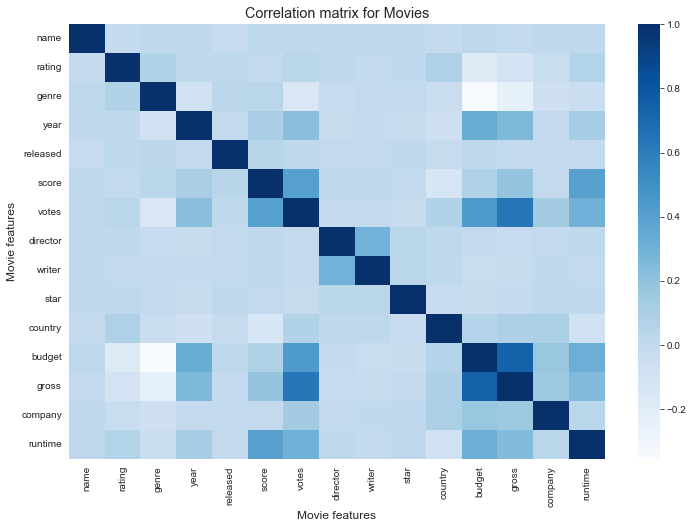

In [15]:
#Let's get a heatmap for all the cells this time

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = False, cmap='Blues')

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()


In [16]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 55000644110
Universal Pictures           51529868192
Columbia Pictures            41522604959
Paramount Pictures           39298033949
Twentieth Century Fox        39159651364
Walt Disney Pictures         33353754158
New Line Cinema              19020537245
Marvel Studios               13546776896
DreamWorks Animation         11873612858
Touchstone Pictures          11619875640
Dreamworks Pictures          10966108508
Metro-Goldwyn-Mayer (MGM)     8563920624
Pixar Animation Studios       7886344526
Summit Entertainment          7500536817
Lucasfilm                     7185352192
Name: gross, dtype: int64

In [17]:
#Looking at top grossing companies year wise

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3502161854
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
                       2019    3051710271
Columbia Pictures      2006    2934631933
Warner Bros.           2010    2807264993
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2019    2716156235
Warner Bros.           2005    2688767210
Columbia Pictures      2009    2619267896
Name: gross, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

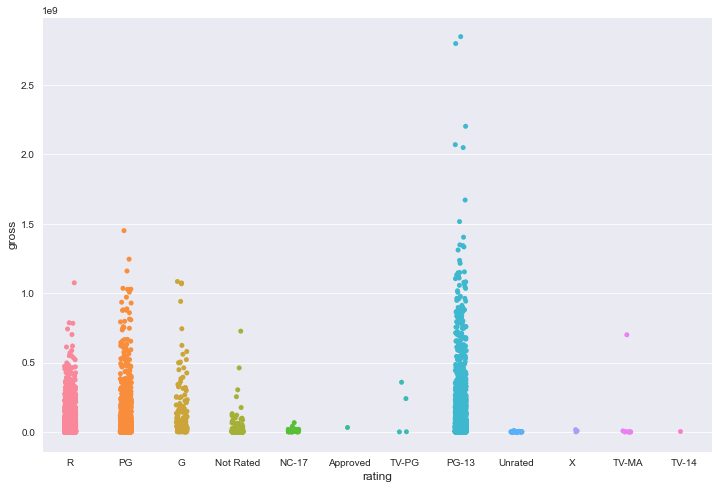

In [18]:
# Now a question might arrise if there are certain rating in which high grossing films fall
sns.set_style('darkgrid')
sns.stripplot(x="rating", y="gross", data=df)

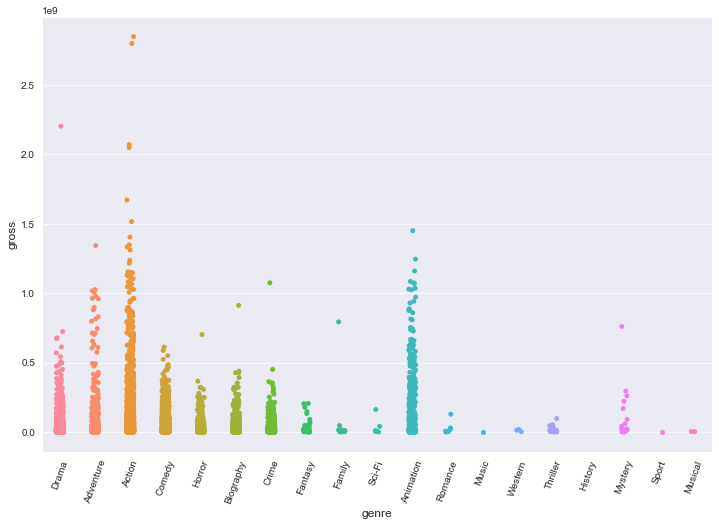

In [19]:
# Lets see if a certain genre has high grossing films
sns.stripplot(x="genre", y="gross", data=df)
plt.xticks(rotation=70);

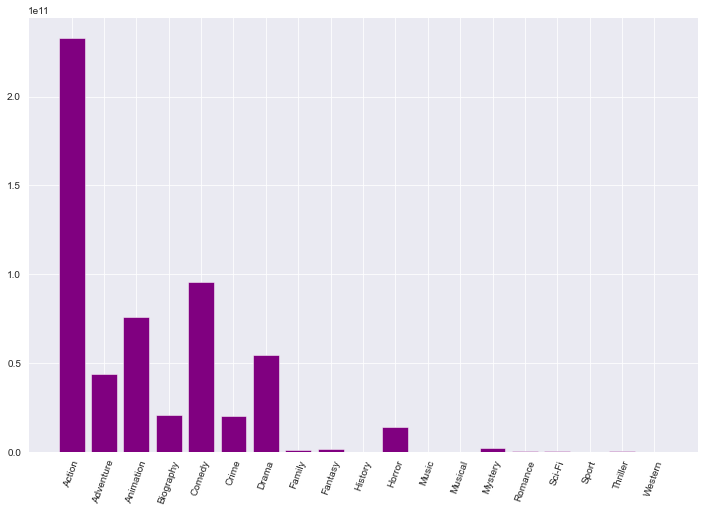

In [26]:
gen_gros=df.groupby('genre').agg({'gross':'sum'}).reset_index()
#So Action, Adventure and Animation are the top 3.
plt.bar(gen_gros.genre,gen_gros.gross,color='purple')
#gen_gros
plt.xticks(rotation=70);

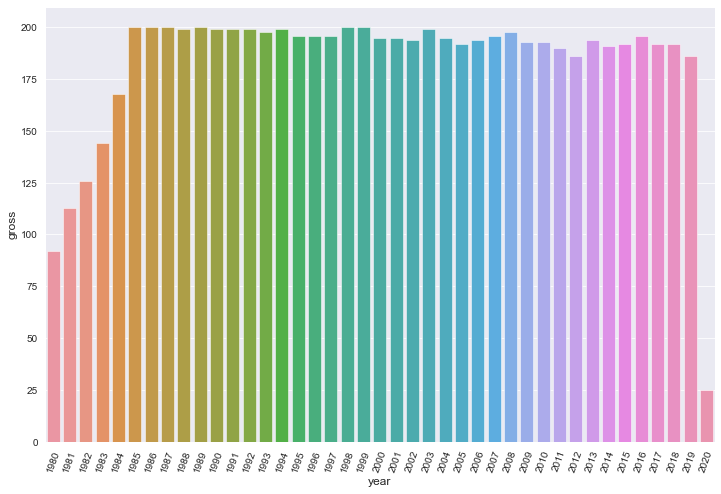

In [31]:
#Lets see how many movies come every year

#plt.bar(df.year,height=2)
year_gros=df.year.value_counts().reset_index()
year_gros.columns=['year','gross']
sns.barplot(x='year',y='gross',data=year_gros)
plt.xticks(rotation=70);

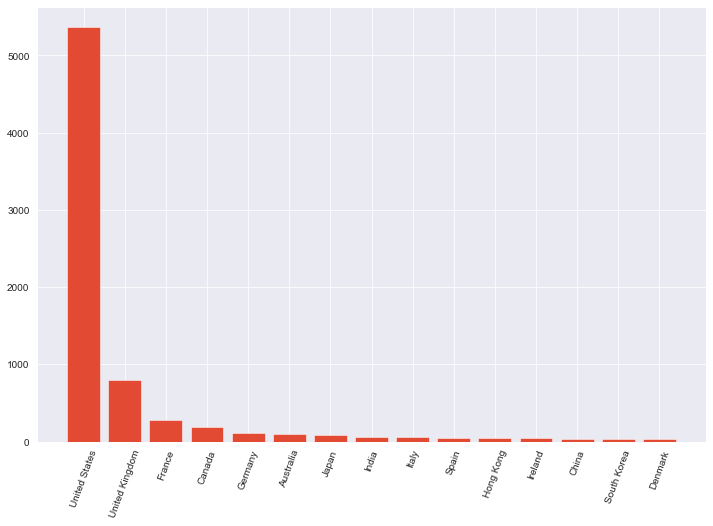

In [109]:
#Lets see no. of movies in diff countries

cou=df.country.value_counts()[0:15].reset_index()
plt.bar(cou['index'],cou.country)
plt.xticks(rotation=70);

In [110]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7512.000000,7509.000000,7.509000e+03,5.366000e+03,7.323000e+03,7508.000000
mean,2000.227769,6.392476,8.720904e+04,3.521071e+07,7.683117e+07,107.163559
std,11.145408,0.968965,1.625851e+05,4.119872e+07,1.621931e+08,18.527652
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,8.900000e+03,1.000000e+07,4.410766e+06,95.000000
50%,2000.000000,6.500000,3.200000e+04,2.000000e+07,1.974592e+07,104.000000
75%,2010.000000,7.100000,9.200000e+04,4.375000e+07,7.402120e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


<AxesSubplot:xlabel='votes', ylabel='gross'>

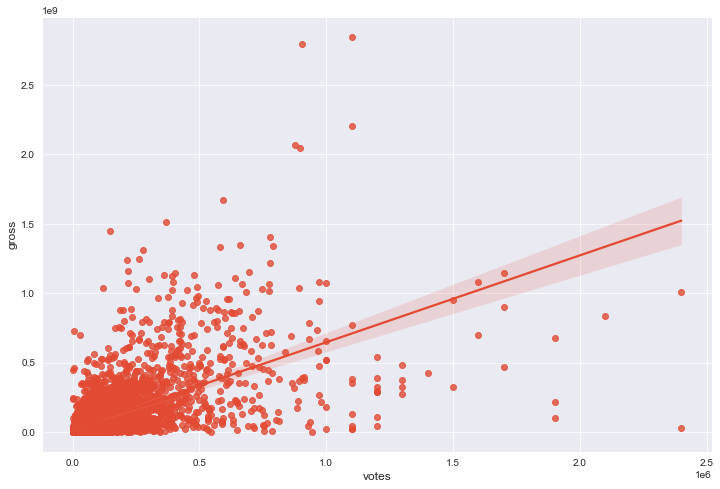

In [33]:
#It seems higher grossing are been voted more
sns.regplot(x='votes',y='gross',data=df)